In [1]:
#Importing required packages.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline

In [2]:
#Loading dataset
wine_input = pd.read_csv('../winequality-red.csv')
wine_input.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
#print the info about the columns to understand the structure
wine_input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
#It is important to understand how the data in columns are distributed in the dataset
#As of now, the idea is to plot the quality with each column and see the distribution pattern

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

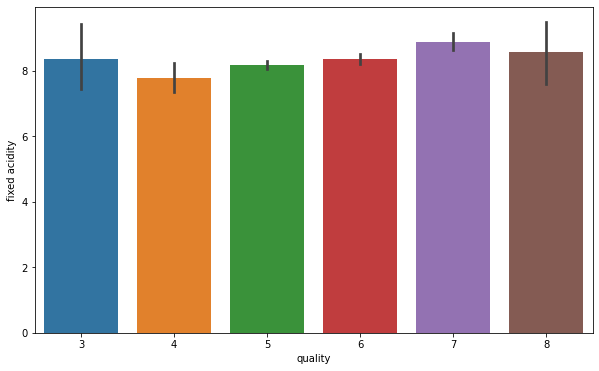

In [5]:
#Plot fixed acidity and check the pattern
plot_fixed_acidity = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = wine_input)

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

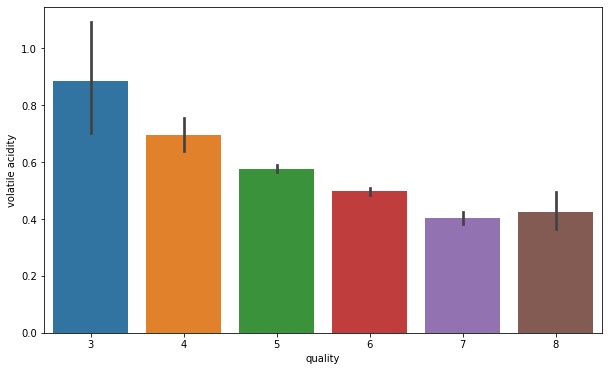

In [6]:
#as seen above, the fixed acidity doesnt give enough indicators to judge the quality.  Lets try the next
#Lets plot volatile acidity and check the pattern
plot_volatile_acidity = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine_input)

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

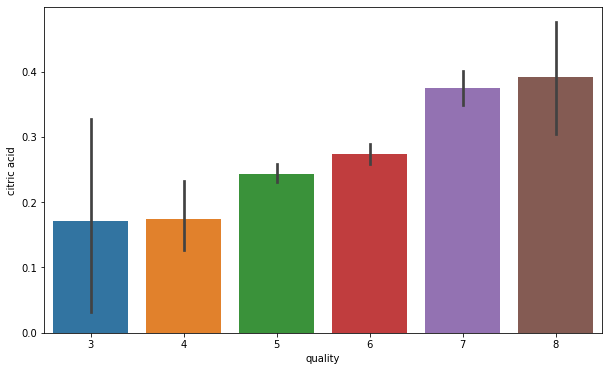

In [7]:
#as seen above, the quality increases as and when volatile acidity decreases.  However, the last bar does indicate a contrary view
#Lets plot citric acid as well and check the pattern
plot_citric_acid = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = wine_input)

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

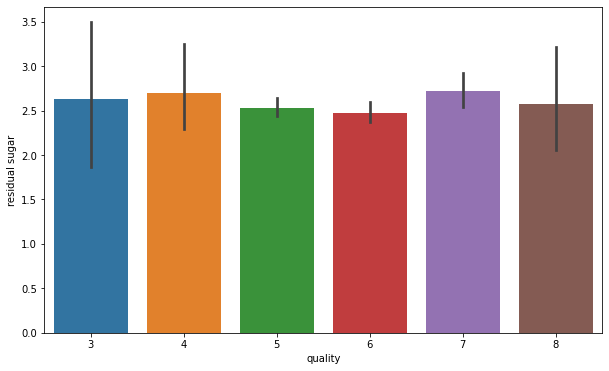

In [8]:
#Above indicates a useful trend.  As and when citric acid increases, the quality of wine increases
#lets plot residual sugar and analyze the trend
plot_residual_sugar = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = wine_input)

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

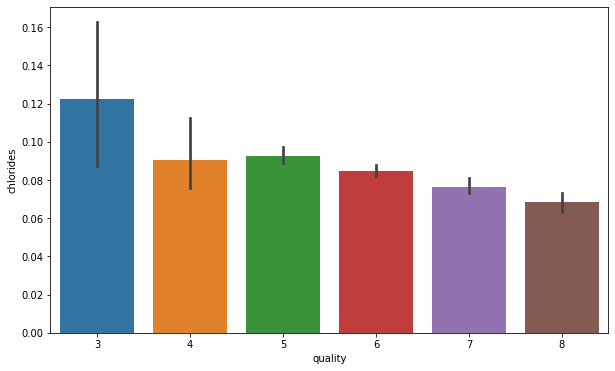

In [9]:
#above indicates no clear pattern on the relation between residual sugar and quality
#lets plot chlorides and check the pattern
plot_chlorides = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = wine_input)

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

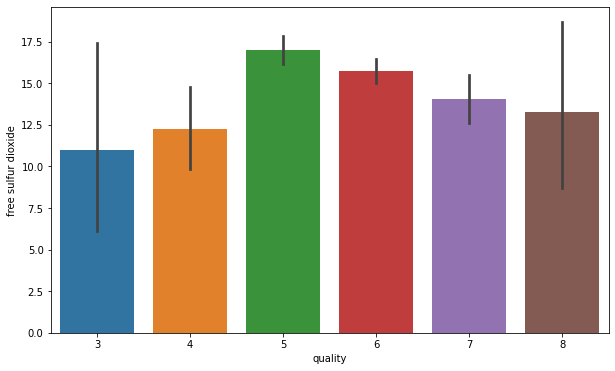

In [10]:
plot_free_sulphur_dioxide = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = wine_input)

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

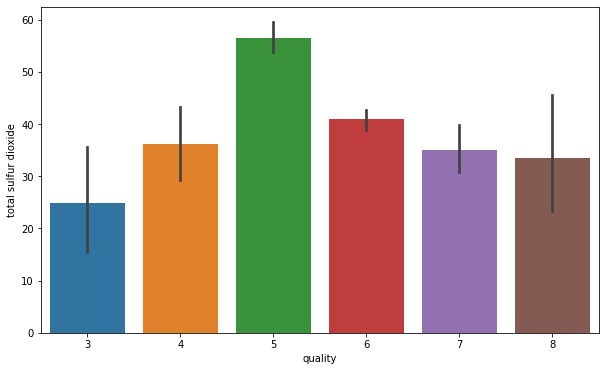

In [11]:
plot_total_sulphur_dioxide = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = wine_input)

<AxesSubplot:xlabel='quality', ylabel='density'>

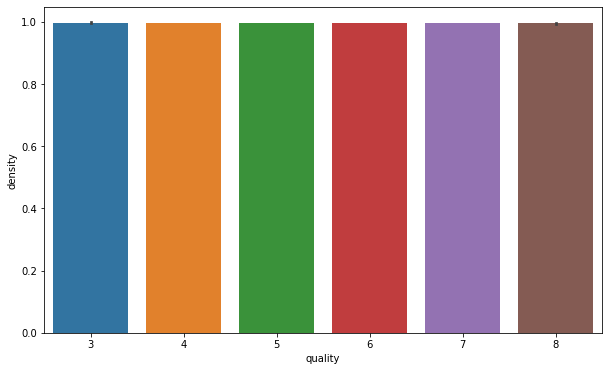

In [12]:
plot_density = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'density', data = wine_input)

<AxesSubplot:xlabel='quality', ylabel='pH'>

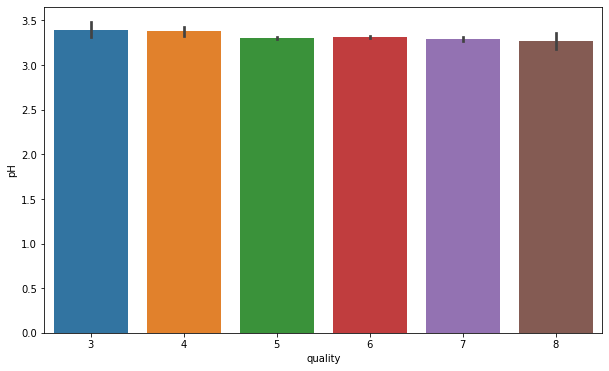

In [13]:
plot_ph = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'pH', data = wine_input)

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

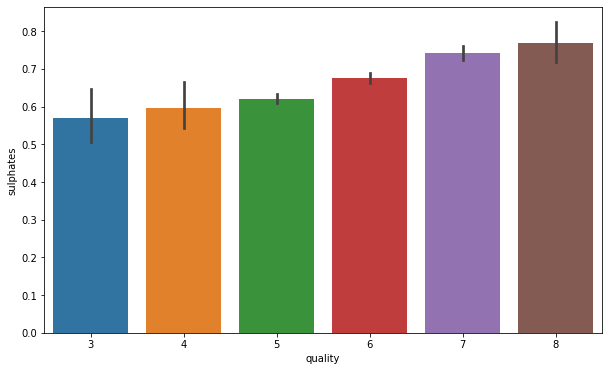

In [14]:
plot_sulphates = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = wine_input)

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

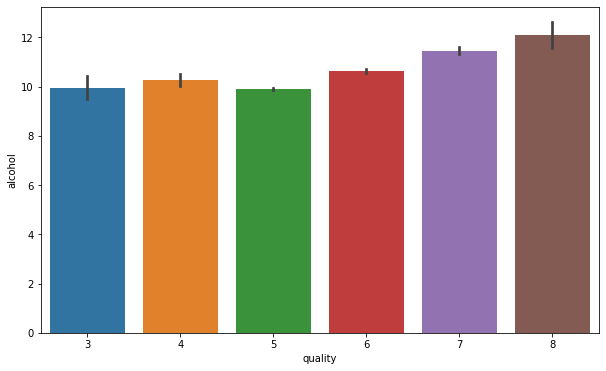

In [15]:
plot_alcohol = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = wine_input)

In [16]:
#Lets pre-process the data
#Making binary classificaion for the response variable.
#Dividing wine as good and bad by giving the limit for the quality
#as per the requirement, any wine of quality 7 and above is considered as good, so setting the cut-off at 6 and higher range at 9
classify_range = (2, 6, 9)
binary_categorize = ['bad', 'good']
wine_input['quality'] = pd.cut(wine_input['quality'], bins = classify_range, labels = binary_categorize)

#Assign labels to our quality variable
label_quality = LabelEncoder()

#Bad becomes 0 and good becomes 1 
wine_input['quality'] = label_quality.fit_transform(wine_input['quality'])
wine_input['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

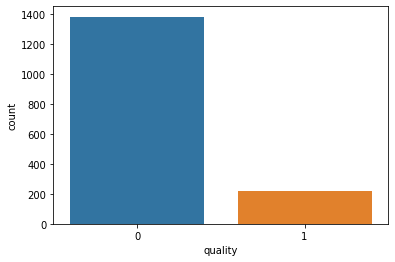

In [17]:
sns.countplot(x=wine_input['quality'])

In [18]:
#As a first step beore proceeding, lets drop the quality column since its not required during training of data
x_axis = wine_input.drop('quality', axis = 1)
y_axis = wine_input['quality']

In [19]:
#Train and Test splitting of data 
x_axis_train, x_axis_test, y_axis_train, y_axis_test = train_test_split(x_axis, y_axis, test_size = 0.2, random_state = 42)

In [20]:
#Further, to get the optimization, lets apply standard scaling
std_scale = StandardScaler()

In [21]:
#get the trained and the test data post applying the scaling
x_axis_train = std_scale.fit_transform(x_axis_train)
x_axis_test = std_scale.fit_transform(x_axis_test)

In [22]:
#Now that we have the testing data and the training data, we can try applying the below classiier models
# 1. Support vector classifier
# 2. Random Forest Classifier
# 3. Stochastic Gradient Descent Classifier

In [23]:
#Support vector classifier
sup_vec_class = SVC()
sup_vec_class.fit(x_axis_train, y_axis_train)
svc_prediction_score = sup_vec_class.predict(x_axis_test)
print(classification_report(y_axis_test, svc_prediction_score))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320



In [24]:
#Lets try random forest
rfc_wine = RandomForestClassifier(n_estimators=100)
rfc_wine.fit(x_axis_train, y_axis_train)
pred_rfc_wine = rfc_wine.predict(x_axis_test)
#Let's see how our model performed
print(classification_report(y_axis_test, pred_rfc_wine))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       273
           1       0.64      0.38      0.48        47

    accuracy                           0.88       320
   macro avg       0.77      0.67      0.71       320
weighted avg       0.86      0.88      0.86       320



In [25]:
#Lets watch out for the Confusion matrix for the RFC
print(confusion_matrix(y_axis_test, pred_rfc_wine))

[[263  10]
 [ 29  18]]


In [26]:
#Stochastic Gradient Descent Classifier
sgd_wine = SGDClassifier(penalty=None)
sgd_wine.fit(x_axis_train, y_axis_train)
pred_sgd_wine = sgd_wine.predict(x_axis_test)
print(classification_report(y_axis_test, pred_sgd_wine))

              precision    recall  f1-score   support

           0       0.86      0.97      0.92       273
           1       0.42      0.11      0.17        47

    accuracy                           0.85       320
   macro avg       0.64      0.54      0.54       320
weighted avg       0.80      0.85      0.81       320



In [27]:
print(confusion_matrix(y_axis_test, pred_sgd_wine))

[[266   7]
 [ 42   5]]


In [28]:
#Now we have 3 models which give us a score without much variations
#Lets go for increasing the accuracy of the models
#We use Grid Search CV for this
#Finding best parameters for our SVC model
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(sup_vec_class, param_grid=param, scoring='accuracy', cv=10)
grid_svc.fit(x_axis_train, y_axis_train)

#get the best parameters for our SVC model
grid_svc.best_params_


{'C': 1.2, 'gamma': 0.9, 'kernel': 'rbf'}

In [29]:
#Let's run our SVC again with the best parameters.
svc_rerun = SVC(C = 1.2, gamma =  0.9, kernel= 'rbf')
svc_rerun.fit(x_axis_train, y_axis_train)
pred_svc_rerun = svc_rerun.predict(x_axis_test)
print(classification_report(y_axis_test, pred_svc_rerun))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       273
           1       0.89      0.34      0.49        47

    accuracy                           0.90       320
   macro avg       0.89      0.67      0.72       320
weighted avg       0.90      0.90      0.88       320



In [30]:
#cross validation for SVC
svc_cross_eval = cross_val_score(estimator = svc_rerun, X = x_axis_train, y = y_axis_train, cv = 10)
print(svc_cross_eval.mean())

0.9085383858267717


In [31]:
#cross validation for RFC model
rfc_eval = cross_val_score(estimator = rfc_wine, X = x_axis_train, y = y_axis_train, cv = 10)
print(rfc_eval.mean())

0.9100947342519685


In [32]:
#cross validation for SGD model
sgd_eval = cross_val_score(estimator = sgd_wine, X = x_axis_train, y = y_axis_train, cv = 10)
print(sgd_eval.mean())

0.8475455216535434


In [33]:
#Lets print the conclusion
arr_scores = [svc_cross_eval.mean(), rfc_eval.mean(), sgd_eval.mean()]
arr_model_name = [ 'SVC', 'RFC', 'SGD']
best = arr_scores[0]
best_index = 0

#Loop through the array    
for i in range(0, len(arr_scores)):    
    #Compare elements of array with max    
   if(arr_scores[i] > best):
    best = arr_scores[i]
    best_index = i
              
print("The Model with the best score is: " + arr_model_name[best_index] + " and the score is: " + str(arr_scores[best_index]))  


The Model with the best score is: RFC and the score is: 0.9100947342519685
